<a href="https://colab.research.google.com/github/Yeyeong99/bda/blob/main/%ED%95%84%EC%88%981_%EC%9D%B4%EC%98%88%EC%98%8112_250208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# 타이타닉 데이터
tt = sns.load_dataset('titanic')

# 결측값 제거
titanic=tt.dropna(subset=['survived', 'age'])

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [10]:
# 결측치가 많은 deck column 제거
titanic.drop('deck', axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [11]:
# 표본 크기
sample_size = 150
np.random.seed(42)

# 생존 여부 추출
sp = titanic['survived'].sample(n=sample_size, random_state=1)
sp

,survived
689,1
278,0
506,1
9,1
494,0
...,...
148,0
105,0
289,1
794,0


In [12]:
# 생존률의 추정량 계산
passengers = len(sp)
survived = sp.sum()
survival_rate = survived / passengers
survival_rate

0.3933333333333333

In [13]:
from scipy.stats import norm

# 99% 신뢰구간 계산
confidence = 0.99

# z-값(정규분포 기준)
z = norm.ppf((1 + confidence) / 2)

margin_of_error = z * np.sqrt((survival_rate * (1 - survival_rate)) / passengers)
confidence_interval = (survival_rate - margin_of_error, survival_rate + margin_of_error)
confidence_interval

(0.2905963302250617, 0.4960703364416049)

In [14]:
# 결과 정리
print(f'표본 크키 :{sample_size}')
print(f"표본 생존률 :{survival_rate:.5f}")
print(f"{confidence * 100:.0f}% 신뢰구간 :{confidence_interval}")

# 전체 데이터 비교
tt_passengers = len(titanic)
tt_survived = sum(titanic['survived'])
tt_survival_rate = tt_survived / tt_passengers
print(f'모집단 생존률 : {tt_survival_rate:.2f}')

표본 크키 :150
표본 생존률 :0.39333
99% 신뢰구간 :(0.2905963302250617, 0.4960703364416049)
모집단 생존률 : 0.41


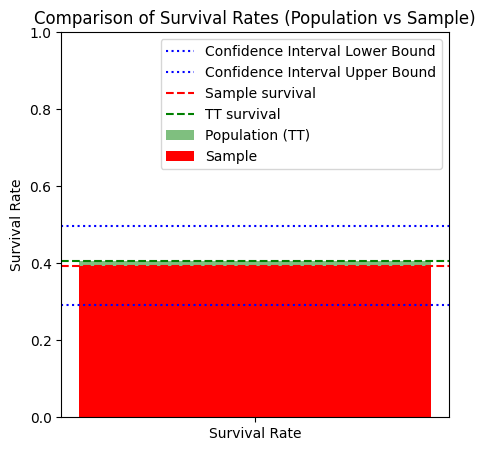

In [16]:
#시각화
plt.figure(figsize=(5,5))

# 막대그래프 - 같은 x 위치에서 겹치도록 조정
plt.bar(['Survival Rate'], [tt_survival_rate], color='green', alpha=0.5, label='Population (TT)')
plt.bar(['Survival Rate'], [survival_rate], color='red', alpha=1, label='Sample')

# 신뢰구간
plt.axhline(confidence_interval[0], color='blue', linestyle='dotted', label='Confidence Interval Lower Bound')
plt.axhline(confidence_interval[1], color='blue', linestyle='dotted', label='Confidence Interval Upper Bound')

# 생존율 표시
plt.axhline(survival_rate, color='red', linestyle='--', label='Sample survival')
plt.axhline(tt_survival_rate, color='green', linestyle='--', label='TT survival')

# 그래프 설정
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # 생존율 범위 (0~1)
plt.title("Comparison of Survival Rates (Population vs Sample)")
plt.legend()
plt.show()

표본을 통해 추측한 생존률의 99% 신뢰구간 안에 모집단의 생존률이 포함되었으므로 성공적으로 추정했다고 할 수 있다.

In [18]:
# 등급 및 alone 여부 생존률 분석
survival_by_pclass_alone = titanic.groupby(['pclass','alone'])['survived'].mean().unstack()
survival_by_pclass_alone

alone,False,True
pclass,,
1,0.710000,0.593023
2,0.637500,0.344086
3,0.292308,0.208889


In [20]:
# 1등급이면서 혼자가 아닌 그룹 추출(생존률이 가장 높음)
first_not_alone_group = titanic[(titanic['pclass'] == 1) & (titanic['alone'] == False)]
first_not_alone_group

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,yes,False
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


In [21]:
# 위 그룹에서 표본추출
sample_size_2= 30
np.random.seed(1)
sp_2= first_not_alone_group.sample(n=sample_size_2, random_state=1)

In [22]:
# 평균, 표준 편차 계산
age_mean = sp_2['age'].mean()
age_std = sp_2['age'].std()

# 표준오차
std_error = age_std/np.sqrt(sample_size_2)

age_mean, age_std, std_error

(32.06666666666667, 14.39332540075274, 2.6278496665014535)

In [24]:
# 신뢰구간 95%
confidence = 0.95
freedom = sample_size_2 - 1
confidence_interval_2 = stats.t.interval(confidence, freedom, age_mean, std_error)
confidence_interval_2

(26.69211063366936, 37.44122269966398)

In [25]:
# 결과 출력
print(f'표본 크키 :{sample_size_2}')
print(f"표본 평균 :{age_mean:.5f}")
print(f"표준 오차 :{std_error:.5f}")
print(f"{confidence*100:.0f}% 신뢰구간 :{confidence_interval_2}")

# 전체 데이터 비교
tt_mean = first_not_alone_group['age'].mean()
print(f'모집단 평균나이 : {tt_mean:.5f}')

표본 크키 :30
표본 평균 :32.06667
표준 오차 :2.62785
95% 신뢰구간 :(26.69211063366936, 37.44122269966398)
모집단 평균나이 : 35.84920


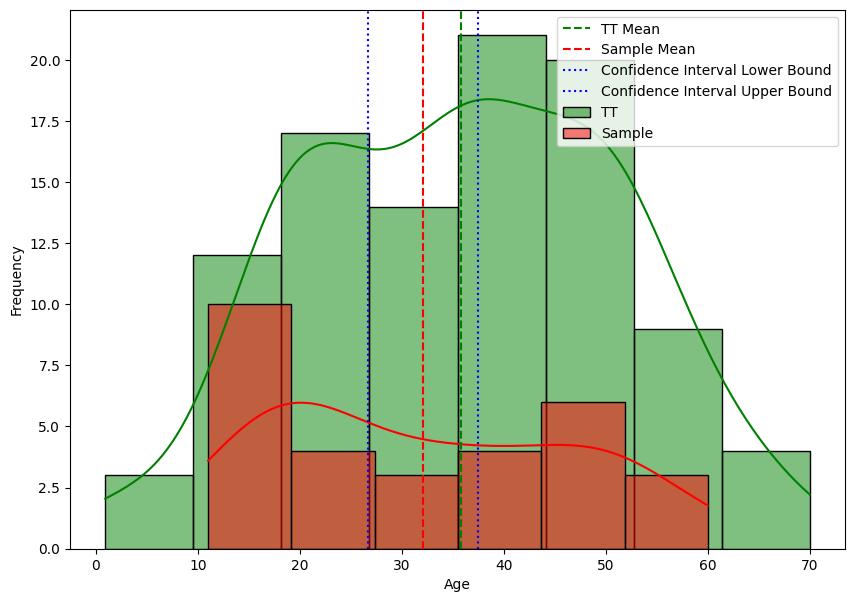

In [27]:
# 시각화

plt.figure(figsize=(10,7))
sns.histplot(first_not_alone_group['age'], kde=True, color='green', label='TT')
sns.histplot(sp_2['age'], kde=True, color='red', label='Sample', alpha=0.5)

plt.axvline(tt_mean, color= 'green', linestyle='--', label='TT Mean')
plt.axvline(age_mean, color= 'red', linestyle='--', label='Sample Mean')

plt.axvline(confidence_interval_2[0], color= 'blue', linestyle='dotted', label='Confidence Interval Lower Bound')
plt.axvline(confidence_interval_2[1], color= 'blue', linestyle='dotted', label='Confidence Interval Upper Bound')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

생존률이 가장 높았던 그룹인 1등급이면서 동승자가 있던 사람들을 표본으로 상정한 후, 이를 통해 평균 나이 신뢰 구간을 구했을 때 신뢰 구간 안에 모집단의 평균 나이가 들어간 것을 확인할 수 있다.